The purpose of this notebook is to predict how long does it take to sell a car. EDA shows that most cars are sold within ten days after posted online.

<img src="assets/dayshistogram.png" width="600">

Below shows the top features used by regressor to determinine how many days to sell a car. Top features include  Additional Registration Fee (ARF), electric cars and truck (type of vehicle).

<img src="assets/daysfeatures.png" width="800">

Most cars are predicted to sell on the seventh day. Most of the sales are within ten days after posting online.

<img src="assets/daysprediction.png" width="600">

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from preprocess_sold import PreprocessedDataFrame
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
model_file = 'reg.pkl'

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
def preprocess_y(extra_df):
    extra_df = extra_df.drop(['price', 'status'], axis=1)
    extra_df['posted'] = pd.to_datetime(extra_df.posted)
    extra_df['last_updated'] = pd.to_datetime(extra_df.last_updated)
    extra_df['days'] = (extra_df['last_updated'] - extra_df['posted']).dt.days
    y = extra_df['days']
    return y

def preprocess_X(df):
    df = df.replace('n.a.', np.nan).replace('n.a', np.nan)
    df['reg_date'] = pd.to_datetime(df.reg_date, format='%d-%b-%Y')
    return df

In [3]:
FOLDER = ''
df = pd.read_csv(FOLDER + 'dataset_with_extra_attributes.csv')

# split into X and y
extra_cols = ['price', 'posted', 'last_updated', 'status']
extra_df = df[extra_cols].copy()
y = preprocess_y(extra_df)

df = df.drop(extra_cols, axis=1)
X = preprocess_X(df)

print('Total data size:', X.shape)

Total data size: (5839, 27)


## EDA

In [4]:
df = pd.concat([X, y], axis=1, ignore_index=False)
df.head(2)

,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transmission,omv,arf,power,no_of_owners,depreciation,reg_date,type_of_vehicle,features,accessories,description,category,title,listing_id,make,model,original_reg_date,fuel_type,opc_scheme,lifespan,days
0,NaN,1446,NaN,NaN,2198,1490,2011.0,auto,25473,25473.0,136.0,1,NaN,2011-10-24,luxury sedan,"2.2 litre twinspark engine, selespeed gearbox....","standard factory options, electric seats, stee...",1 owner only! rare alfa romeo for sale. no sti...,"coe car, premium ad car",Alfa Romeo 159 2.2A JTS Selespeed (New 10-yr COE),1027303,alfa romeo,159,NaN,NaN,NaN,NaN,31
1,NaN,NaN,NaN,7174,1962,NaN,1974.0,auto,NaN,NaN,NaN,more than 6,NaN,1974-07-18,sports car,NaN,3494,"fully restored, very good condition new paint ...","coe car, rare & exotic, low mileage car, vinta...",Alfa Romeo Spider 2000 (COE till 02/2022),925918,alfa romeo,2000,NaN,NaN,NaN,NaN,10


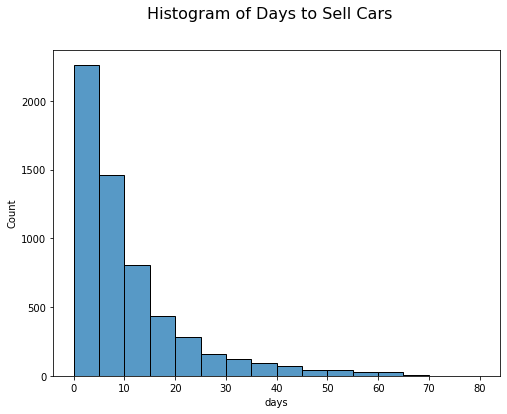

In [5]:
fig  = plt.figure(figsize=(8, 6))
title = 'Histogram of Days to Sell Cars'
fig.suptitle(title, fontsize=16)
sns.histplot(data=df, x="days", binwidth=5)
plt.savefig('assets/dayshistogram', dpi=300, facecolor='white')
plt.show()

### Split data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('Train:', X_train.shape)
print('Test:', X_test.shape)

X_train.head()

Train: (4671, 27)
Test: (1168, 27)


,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transmission,omv,arf,power,no_of_owners,depreciation,reg_date,type_of_vehicle,features,accessories,description,category,title,listing_id,make,model,original_reg_date,fuel_type,opc_scheme,lifespan
5397,NaN,3100,NaN,83000,3456,2030,2013.0,auto,43780,53292.0,206.0,1,NaN,2014-01-15,mpv,powerful 3.5l v6 dual vvt-i engine producing 2...,"20"" sports rims, multi function steering, elec...","1 owner! low mileage of 88,000km. low deprecia...","parf car, premium ad car",Toyota Vellfire 3.5A Z G-Edition,1027047,toyota,vellfire,NaN,NaN,NaN,NaN
1647,NaN,1630,NaN,39000,2356,1865,2018.0,auto,32906,38069.0,129.0,1,NaN,2018-04-12,mpv,"airbags, abs, powerful/reliable 2.4l 4 cylinde...","leather seats, sports rims, original factory a...",check out the most popular and best specs mode...,"parf car, premium ad car",Honda Odyssey 2.4A EXV-S Navi Res Sunroof,938989,honda,odyssey,NaN,NaN,NaN,NaN
1669,NaN,682,NaN,42900,1496,1130,2016.0,auto,19688,9688.0,97.0,1,NaN,2017-08-31,stationwagon,"steering control.dohc inline 16 valves. abs, e...","fully sound proof.sports rims, retractable sid...",1 owner.accident free.smooth with super underc...,NaN,Honda Shuttle 1.5A G,1010423,honda,shuttle,NaN,NaN,NaN,NaN
3159,NaN,2382,NaN,41000,2996,1845,2017.0,auto,69109,96397.0,270.0,1,NaN,2019-06-17,suv,"amg dynamic, 3.0l v6 biturbo engine, keyless g...","full amg package, electric/memory seats, panor...","beautiful unit with one owner only, perfect co...",parf car,Mercedes-Benz GLC-Class GLC43 AMG 4MATIC,1023983,mercedes-benz,c43,NaN,NaN,NaN,NaN
4575,NaN,548,NaN,33889,1461,1320,2016.0,auto,19990,5000.0,81.0,1,NaN,2017-01-24,mid-sized sedan,1.5l diesel turbocharged. 6 speed auto dual cl...,dark grey. sunroof. kick boot sensor. walk awa...,proudly presented by kelvincarz automobile. hi...,"opc car, parf car, premium ad car, low mileage...",Renault Megane Sedan Diesel 1.5T dCi Sunroof (...,1014420,renault,megane,NaN,diesel,revised opc scheme . learn more about opc sche...,NaN


## Preprocessing

**NOTE**: On windows, you might receive an error `Overflowerror: Python int too large to convert to C long` when you run the cell below with the `dataset_with_extra_attributes.csv`. It could be fixed by chaging the dtype from np.int to np.float64 but it will affect other tasks. Hence, we have decided to not make this change and continue with the other tasks.

### Train data

In [7]:
preprocessed_df = PreprocessedDataFrame(X_train, y_train, target_encoding=True)
X_train_prepared = preprocessed_df.build_dataframe()

Date: ['reg_date', 'manufactured', 'lifespan', 'original_reg_date']
Num: ['coe', 'arf', 'dereg_value', 'no_of_owners', 'power', 'depreciation', 'omv', 'mileage', 'curb_weight', 'road_tax', 'engine_cap']
OneHot Cat: ['title', 'make', 'model']
Label Cat: ['listing_id', 'description', 'fuel_type', 'accessories', 'opc_scheme', 'transmission', 'category', 'features']
26

transformed_attribs 40 ['years_since_reg_date', 'years_since_manufactured', 'make', 'model', 'fuel_type', 'transmission', 'cat_parf', 'cat_premium_ad', 'cat_low_mileage', 'cat_imported_used', 'cat_coe', 'cat_almost_new', 'cat_rare_&_exotic', 'cat_hybrid', 'cat_direct_owner_sale', 'cat_sgcarmart_warranty', 'cat_vintage', 'cat_sta_evaluated', 'cat_opc', 'cat_consignment', 'cat_electric', 'coe', 'arf', 'no_of_owners', 'power', 'omv', 'curb_weight', 'road_tax', 'engine_cap', 'tov_bus/mini bus', 'tov_hatchback', 'tov_luxury sedan', 'tov_mid-sized sedan', 'tov_mpv', 'tov_others', 'tov_sports car', 'tov_stationwagon', 'tov_suv', '

In [8]:
model_target_encoder = TargetEncoder()
X_train_prepared.loc[:, 'model'] = model_target_encoder.fit_transform(X_train_prepared.pop('model'), y=y_train)

make_target_encoder = TargetEncoder()
X_train_prepared.loc[:, 'make'] = make_target_encoder.fit_transform(X_train_prepared.pop('make'), y=y_train)

imputer = SimpleImputer()
X_train_prepared = imputer.fit_transform(X_train_prepared)

### Test data

In [9]:
def preprocess_test(X_test):
    X_test_prepared = preprocessed_df.transform_dataframe(X_test)
    X_test_prepared.loc[:, 'model'] = model_target_encoder.transform(X_test_prepared.pop('model'))
    X_test_prepared.loc[:, 'make'] = make_target_encoder.transform(X_test_prepared.pop('make'))
    X_test_prepared = imputer.transform(X_test_prepared)
    return X_test_prepared

In [10]:
X_test_prepared = preprocess_test(X_test)

Input shape: (1168, 27)
Transformed shape: (1168, 40)


## Model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [12]:
def rmse(model, data, labels):
    predictions = model.predict(data)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    print(rmse)
    
def display_scores(scores):
    print("Scores:", scores)
    print(f"Mean: \033[1m{scores.mean()}\033[0m", )
    print("Standard deviation:", scores.std())
    print()
    
def cvs(model, data, labels):
    scores = cross_val_score(model, data, labels, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

lin_reg 11.166386655411875 0.7314381148014383
tree_reg 15.855891424637562 0.874611716583507
forest_reg 11.71685321775379 0.6090914836324743
svm_reg 11.792773208313069 0.8137321941584074
mlp_reg 11.243607924931245 0.7622988201279639
xgb_reg 12.004623653015758 0.7232401786499345
light_reg 11.34282122774367 0.673992901907731
cat_reg 11.390126553982917 0.7410192345331351


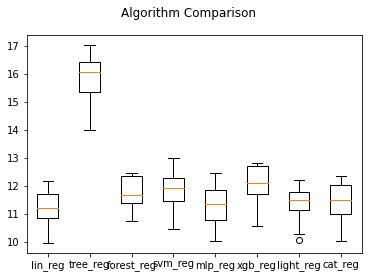

In [13]:
models = []
models.append(('lin_reg', LinearRegression()))
models.append(('tree_reg', DecisionTreeRegressor(random_state=42)))
models.append(('forest_reg', RandomForestRegressor(n_estimators=30, random_state=42)))
models.append(('svm_reg', SVR()))
models.append(('mlp_reg', MLPRegressor()))
models.append(('xgb_reg', XGBRegressor()))
models.append(('light_reg', LGBMRegressor()))
models.append(('cat_reg', CatBoostRegressor(silent=True)))

results = []
names = []
for name, model in models:
    reg = model.fit(X_train_prepared, y_train)
    scores = cvs(reg, X_train_prepared, y_train)
    # display_scores(rmse_scores)
    results.append(scores)
    names.append(name)
    print(f'{name} \033[1m{scores.mean()}\033[0m {scores.std()}')
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Grid search

In [13]:
# NOTE: Even if this cell gives an error, you can continue running the cells below.
! rm reg.pkl

rm: reg.pkl: No such file or directory


In [14]:
n_estimators = [100, 200, 400]
learning_rate  = [0.001, 0.01, 0.1, 0.2]
param_grid = [
    {'n_estimators': n_estimators, 'learning_rate': learning_rate},
  ]

regressor = LGBMRegressor(random_state=42)
grid_search = GridSearchCV(regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prepared, y_train)
joblib.dump(grid_search, model_file)

['reg.pkl']

In [15]:
# If you would like to reload the model, uncomment and run the following cell:
# grid_search = joblib.load(mode_file)

#### Grid search results

In [16]:
print(grid_search.best_params_, np.sqrt(-grid_search.cv_results_['mean_test_score'].max()))
print(grid_search.best_estimator_)

{'learning_rate': 0.01, 'n_estimators': 200} 11.13080650191844
LGBMRegressor(learning_rate=0.01, n_estimators=200, random_state=42)


In [17]:
cvres = grid_search.cv_results_
result_df = pd.DataFrame(grid_search.cv_results_)
result_df['mean_test_score'] = np.sqrt(-result_df['mean_test_score']).round(2)
result_df['std_test_score'] = np.sqrt(result_df['std_test_score']).round(2)
result_df.loc[:, [col for col in result_df if col.startswith('param')] + ['mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_learning_rate,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score
4,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",11.13,3.72,1
5,0.01,400,"{'learning_rate': 0.01, 'n_estimators': 400}",11.14,3.66,2
3,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",11.18,3.76,3
2,0.001,400,"{'learning_rate': 0.001, 'n_estimators': 400}",11.30,3.77,4
1,0.001,200,"{'learning_rate': 0.001, 'n_estimators': 200}",11.39,3.77,5
6,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",11.42,3.64,6
0,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",11.45,3.78,7
7,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",11.69,3.61,8
9,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",11.72,3.75,9
8,0.1,400,"{'learning_rate': 0.1, 'n_estimators': 400}",12.06,3.59,10


#### Feature importance

In [18]:
feature_importances = grid_search.best_estimator_.feature_importances_
print('feature_importances', len(feature_importances))

feature_importances 40


In [19]:
important_features = sorted(zip(feature_importances, preprocessed_df.transformed_attribs), reverse=True)
important_features[:10]

[(769, 'cat_consignment'),
 (614, 'power'),
 (612, 'tov_truck'),
 (559, 'no_of_owners'),
 (445, 'tov_van'),
 (437, 'arf'),
 (430, 'curb_weight'),
 (352, 'cat_electric'),
 (293, 'omv'),
 (286, 'years_since_reg_date')]

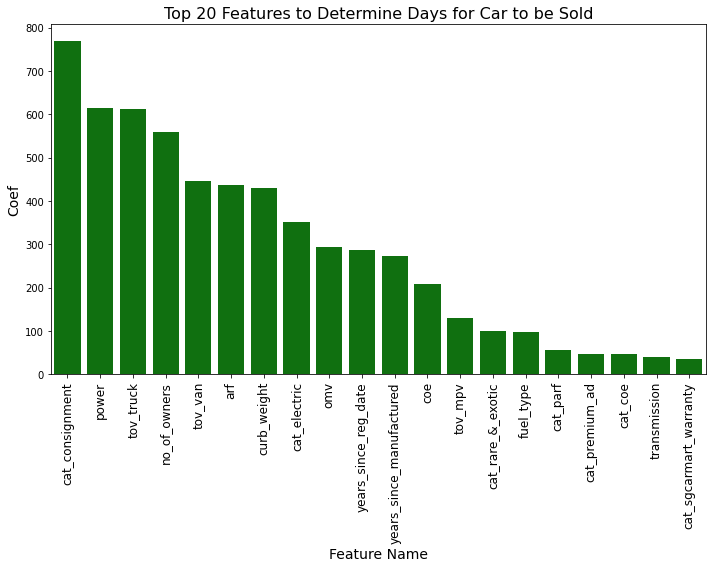

In [20]:
df = pd.DataFrame(important_features, columns=["value", "feature"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
title = 'Top 20 Features to Determine Days for Car to be Sold'
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_title(title, fontsize=16)
ax.set_ylabel("Coef", fontsize=14)
ax.set_xlabel("Feature Name", fontsize=14)
plt.savefig('assets/daysfeatures', dpi=300, facecolor='white')
plt.tight_layout()
plt.show()

## Optuna based hyperparam optimization

In [21]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [22]:
def objective(trial: Trial,X,y) -> float:
    
    joblib.dump(study, 'study.pkl')

    param = {
                "metric": "error",
                "boosting_type": "gbdt",
                "n_estimators" : trial.suggest_int('n_estimators', 0, 2000),
                'max_depth':trial.suggest_int('max_depth', 2, 250),
                'reg_alpha':trial.suggest_int('reg_alpha', 0, 5),
                'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 10),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
                'nthread' : -1,
                'random_seed': 42
            }
    
    model = LGBMRegressor(**param)
    
    return cross_val_score(model, X, y, cv=3).mean()

In [24]:
study = optuna.create_study(direction='maximize',sampler=TPESampler(seed=42))
study.optimize(lambda trial : objective(trial,X_train_prepared,y_train),n_trials= 10)

[I 2021-11-11 14:45:12,395] A new study created in memory with name: no-name-4de3955a-c2d4-423f-b9c1-bb3c0a6e72a9


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:15,196] Trial 0 finished with value: 0.05768479312597278 and parameters: {'n_estimators': 749, 'max_depth': 238, 'reg_alpha': 4, 'reg_lambda': 3, 'min_child_weight': 1, 'learning_rate': 0.010255552094216988, 'colsample_bytree': 0.15000000000000002}. Best is trial 0 with value: 0.05768479312597278.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:19,926] Trial 1 finished with value: -0.3061729703876828 and parameters: {'n_estimators': 1733, 'max_depth': 151, 'reg_alpha': 4, 'reg_lambda': 0, 'min_child_weight': 10, 'learning_rate': 0.2311294500510414, 'colsample_bytree': 0.29000000000000004}. Best is trial 0 with value: 0.05768479312597278.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:21,173] Trial 2 finished with value: 0.03950713356715881 and parameters: {'n_estimators': 363, 'max_depth': 47, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 4, 'learning_rate': 0.01911737612337593, 'colsample_bytree': 0.65}. Best is trial 0 with value: 0.05768479312597278.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:23,535] Trial 3 finished with value: 0.06137636023286116 and parameters: {'n_estimators': 279, 'max_depth': 74, 'reg_alpha': 2, 'reg_lambda': 2, 'min_child_weight': 8, 'learning_rate': 0.01254057843022616, 'colsample_bytree': 0.56}. Best is trial 3 with value: 0.06137636023286116.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:26,481] Trial 4 finished with value: -0.3163031677579388 and parameters: {'n_estimators': 1185, 'max_depth': 13, 'reg_alpha': 3, 'reg_lambda': 1, 'min_child_weight': 0, 'learning_rate': 0.39513097748541137, 'colsample_bytree': 0.97}. Best is trial 3 with value: 0.06137636023286116.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:32,613] Trial 5 finished with value: 0.007332905320805179 and parameters: {'n_estimators': 1617, 'max_depth': 77, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 4, 'learning_rate': 0.008770946743725395, 'colsample_bytree': 0.55}. Best is trial 3 with value: 0.06137636023286116.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:32,880] Trial 6 finished with value: 0.054923063223719204 and parameters: {'n_estimators': 68, 'max_depth': 228, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 3, 'learning_rate': 0.0548410860376476, 'colsample_bytree': 0.59}. Best is trial 3 with value: 0.06137636023286116.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:34,132] Trial 7 finished with value: -0.06570681414722428 and parameters: {'n_estimators': 369, 'max_depth': 243, 'reg_alpha': 4, 'reg_lambda': 5, 'min_child_weight': 9, 'learning_rate': 0.0784819819433057, 'colsample_bytree': 0.93}. Best is trial 3 with value: 0.06137636023286116.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:34,741] Trial 8 finished with value: 0.056912414366761165 and parameters: {'n_estimators': 177, 'max_depth': 50, 'reg_alpha': 0, 'reg_lambda': 1, 'min_child_weight': 4, 'learning_rate': 0.017444883274451827, 'colsample_bytree': 0.85}. Best is trial 3 with value: 0.06137636023286116.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2021-11-11 14:45:37,573] Trial 9 finished with value: 0.04105140718836353 and parameters: {'n_estimators': 713, 'max_depth': 71, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 8, 'learning_rate': 0.007048087574907934, 'colsample_bytree': 0.99}. Best is trial 3 with value: 0.06137636023286116.


In [25]:
study.best_trial.params

{'n_estimators': 279,
 'max_depth': 74,
 'reg_alpha': 2,
 'reg_lambda': 2,
 'min_child_weight': 8,
 'learning_rate': 0.01254057843022616,
 'colsample_bytree': 0.56}

In [23]:
best_lgbm = LGBMRegressor(**{'n_estimators': 749,
 'max_depth': 238,
 'reg_alpha': 4,
 'reg_lambda': 3,
 'min_child_weight': 1,
 'learning_rate': 0.010255552094216988,
 'colsample_bytree': 0.15000000000000002,
 'random_state': 42})

In [24]:
best_lgbm.fit(X_train_prepared, y_train)

LGBMRegressor(colsample_bytree=0.15000000000000002,
              learning_rate=0.010255552094216988, max_depth=238,
              min_child_weight=1, n_estimators=749, random_state=42,
              reg_alpha=4, reg_lambda=3)

## Test

### LGBM with Grid Search

In [25]:
final_model = grid_search.best_estimator_

In [26]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, mean_squared_error

In [27]:
final_predictions = final_model.predict(X_test_prepared)

print("MSE: ", mean_squared_error(y_test, final_predictions))

MSE:  108.95305941449038


### LGBM with Optuna

In [28]:
final_predictions = best_lgbm.predict(X_test_prepared)

In [29]:
print("MSE: ", mean_squared_error(y_test, final_predictions))

MSE:  108.67018933582722


Since the loss has not reduced significantly after tuning with optuna, we will continue to use the model obtained from Grid Search.

## Prediction on Unsold Cars

In [30]:
new_df = pd.read_csv(FOLDER + 'train.csv')
new_df = new_df.drop(['eco_category', 'indicative_price', 'price'], axis=1)
print('Total data size:', new_df.shape)

new_prepared = preprocess_test(new_df)

Total data size: (16784, 27)
Input shape: (16784, 27)
Transformed shape: (16784, 40)


In [31]:
predictions = final_model.predict(new_prepared)
prediction_df = pd.DataFrame(predictions.astype(int), columns=['days'])
predicted_df = pd.concat([new_df, prediction_df], axis=1)
predicted_df[['listing_id', 'make', 'model', 'manufactured', 'road_tax', 'arf', 'days']].head(10)

,listing_id,make,model,manufactured,road_tax,arf,days
0,1030324,bmw,320i,2013.0,1210.0,50462.0,7
1,1021510,NaN,hiace,2014.0,NaN,1376.0,7
2,1026909,mercedes-benz,cla180,2016.0,740.0,26041.0,8
3,1019371,mercedes-benz,e180,2019.0,684.0,56977.0,13
4,1031014,NaN,civic,2019.0,742.0,20101.0,6
5,1027957,mercedes-benz,a35,NaN,1202.0,NaN,14
6,1012998,volvo,v40,2015.0,684.0,18933.0,8
7,1011676,mercedes-benz,amg,2018.0,3922.0,68095.0,16
8,991798,NaN,corolla,2011.0,816.0,15263.0,6
9,985245,bmw,318i,2016.0,684.0,28804.0,7


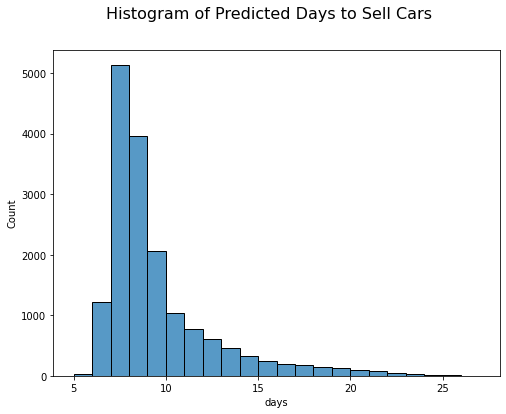

In [32]:
fig  = plt.figure(figsize=(8, 6))
title = 'Histogram of Predicted Days to Sell Cars'
fig.suptitle(title, fontsize=16)
sns.histplot(data=predicted_df, x="days", binwidth=1)
plt.savefig('assets/daysprediction', dpi=300, facecolor='white')
plt.show()

## Model Explanation

Here, we will try to explore the features that are most important to the LGB model, along with how changes in different features affect the overall output.

In [33]:
import shap

In [34]:
explainer = shap.Explainer(final_model)

In [35]:
explainer_train_df = pd.DataFrame(X_train_prepared)

In [36]:
explainer_train_df.columns = preprocessed_df.transformed_attribs

In [37]:
shap_values = explainer(explainer_train_df)

### Beeswarm plot

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. 

**NOTE**: Sometimes you may see a slightly different plot for the feature importances, but the order of features should be more or less the same for a *given record*.

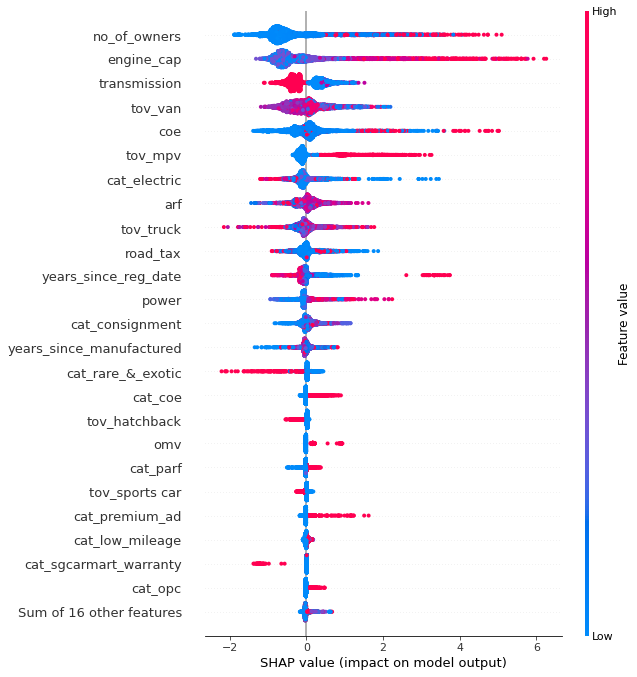

In [37]:
shap.plots.beeswarm(shap_values, max_display=25)

The color represents the feature value (red high, blue low). This reveals for example that 

- Having a lower `engine_cap` increases the chance of the car being sold faster. This is intuitive since cars with lower engine capacity are typically consumer cars.
- If the current car has a `consignment` category, we can expect it to take longer(more number of days) to sell. This is intuitive, since `consignment` means that there is a 3rd party responsible for selling the car and the consumer would prefer to buy a car directly from other consumers.
- Having a high `no_of_owners` (% lower status of the population) lowers the chance of the car being sold.

### Waterfall Plot

We will first visualize the features for a random sample:

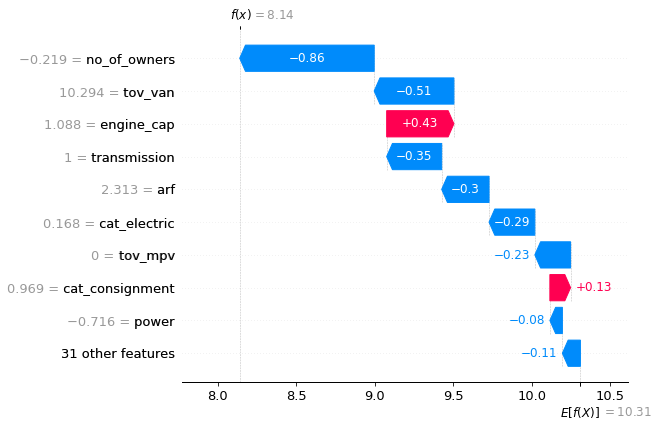

In [38]:
shap.plots.waterfall(shap_values[0])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

**NOTE**: The above plot only shows the effect of features for the *given* record, and not the whole dataset. For the whole dataset, continue to the plots below.

For our model, we observe that:

- Given the current car has a low `engine_cap`, it increases the chance of the car being sold in a lower amount of days i.e this car will be sold fast. We see a similar effect when the given car is a `van`.
- However, the presence of `consignment` i.e having a third party sell your car to the consumer, can icrease the number of days required to sell the car. This is intuitive since people would likely trust individuals over big companies while buying cars, as they rely on the previous owners personal experience.

We can visualize the effect of all features for a specific record as shown below:

In [42]:
# NOTE: This is an interactive JS plot. You will need to run all the cells above this cell to visualize and interact
# with the plot.
shap.initjs()
shap.plots.force(shap_values[0])

### Force plot

We can also try to visualize the effect of all features for a sample(or all records) of the dataset.

In [43]:
# NOTE: This is an interactive JS plot. You will need to run all the cells above this cell to visualize and interact
# with the plot.
shap.initjs()
shap.plots.force(shap_values.sample(100, random_state=42))

Clicking on the interactive plot above shows the record for which the given feature effects are shown. 

### Dominating Features

We know the the feature `cat_electric` and `road_tax` are some of the most dominating features for the given model. Here we can also assess the individual impact of these features.

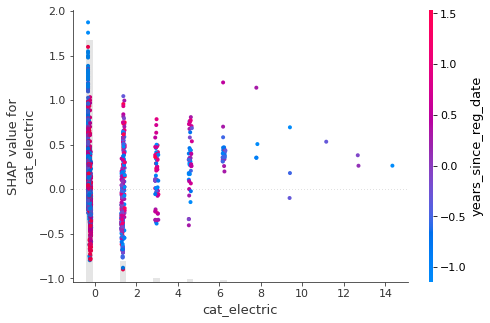

In [44]:
shap.plots.scatter(shap_values[:,"cat_electric"], color=shap_values)

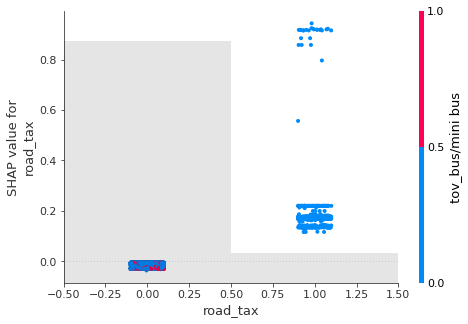

In [45]:
shap.plots.scatter(shap_values[:,"road_tax"], color=shap_values)

As noted above

- For a given car, if it is in the category `electric` and has a low value for `years_since_reg_date` i.e it's a fairly new car, we can expect this car to be sold faster. This is intuitive since electric cars provide a good alternative to petrol cars, are eco friendly and are preferred by the new age consumer.

**NOTE**: The scale of the plots has been normalized as part of the preprocessing. 